In [122]:
import pymolpro
import pandas as pd


In [123]:
backend = 'local' 
project_name = 'PX13_methodtest'
parallel = 4

In [124]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [125]:
db = pymolpro.database.load("GMTKN55_PX13")

In [126]:
small=db.subset(open_shell=False,max_electrons=40)
print(small)

GMTKN55 PX13 (closed shell only) (maximum number of electrons 40):

Molecules:
nh3_2_ts: {'geometry': '8\n 2NH3TS (Full point group C2v)\n H 0.673346 0.000000 -0.244115\n H -0.673346 0.000000 -0.244115\n H 0.000000 0.809962 1.821379\n H 0.000000 -0.839127 -1.730643\n N 0.000000 0.000000 -1.165033\n N 0.000000 0.000000 1.208856\n H 0.000000 -0.809962 1.821379\n H 0.000000 0.839127 -1.730643\n', 'description': 'nh3_2_ts'}
nh3_3_ts: {'geometry': '12\n 3NH3TS (Full point group Cs)\n H 0.000000 1.039215 0.000000\n H 0.975536 -0.391735 0.000000\n H -0.718624 -0.750749 0.000000\n H 1.615871 1.288560 0.821991\n H 0.276209 -2.048201 -0.821994\n H -1.974443 0.792779 -0.810562\n N 1.170289 0.899018 0.000000\n N 0.223683 -1.458692 0.000000\n N -1.407141 0.564959 0.000000\n H 0.276209 -2.048201 0.821994\n H -1.974443 0.792779 0.810562\n H 1.615871 1.288560 -0.821991\n', 'description': 'nh3_3_ts'}
h2o_2_ts: {'geometry': '6\n 2H2OTS (Full point group C2h)\n O 0.000000 1.098108 0.000000\n H 0.000000 0

In [127]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small,methods[method], basis, location=project_name,
                                                       backend=backend,
                                                       preamble="core,small", parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb528c43d60>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4f19cd600>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4f19cdbd0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb492259810>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb5289f5b40>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb490d58f40>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb490d583d0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb513163310>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb4f19ea200>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb4fa752590>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb492078340>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb513f1b580>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fb513f31f60>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fb52aaeada0>}, 'CCSD':

In [128]:
analyse=pymolpro.database.analyse([result['cc-pVTZ'] for result in results.values()],small)
analyse['reaction statistics']

,HF/cc-pVTZ,MP2/cc-pVTZ,MP3/cc-pVTZ,MP4/cc-pVTZ,PAPT;MP2/cc-pVTZ,PAPT;MP3/cc-pVTZ,PAPT;MP4/cc-pVTZ,CCSD/cc-pVTZ,CCSD(T)/cc-pVTZ
MAD,0.026944,0.004981,0.003924,0.002965,0.003774,0.003831,0.001558,0.003917,0.001624
MAXD,0.033282,0.006754,0.006213,0.004420,0.006465,0.006480,0.002917,0.006399,0.002967
RMSD,0.027319,0.005248,0.004251,0.003237,0.004203,0.004250,0.001833,0.004353,0.001878
MSD,0.026944,-0.004981,0.003924,-0.002689,0.003774,0.003831,-0.000923,0.003917,-0.000997
STDEVD,0.004785,0.001753,0.001733,0.001912,0.001963,0.001951,0.001679,0.002014,0.001687


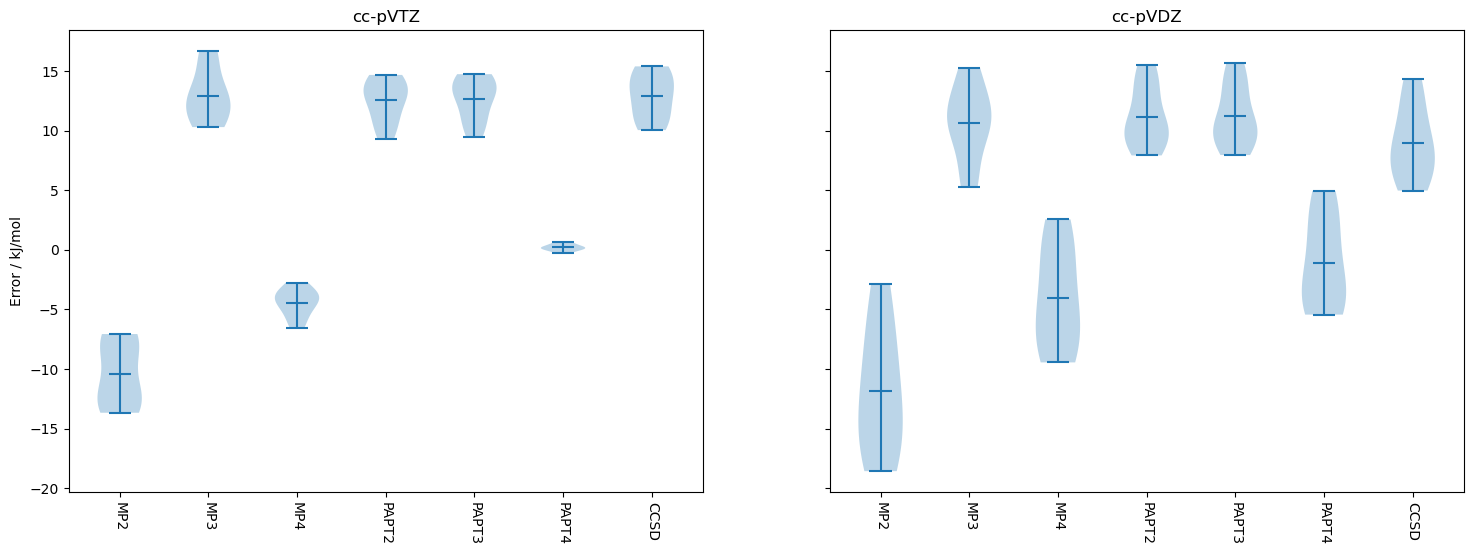

In [130]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pVTZ', 'cc-pVDZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pVTZ'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")


In [131]:
extrapolate=pymolpro.database.basis_extrapolate(results[method].values(), results["HF"].values())
extrapolate